In [12]:
import numpy as np
import pandas as pd


import json
import requests
from pprint import pprint

import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.stats import linregress

from sklearn import datasets


In [13]:
file_path = "Resources/Chicago_Health_Suicide_Mortality_Rate.csv"
suicide_df= pd.read_csv(file_path)
#suicide_df

In [14]:
suicide_cleaned = suicide_df.drop(index=[0,0])

suicide_cleaned = suicide_cleaned[suicide_cleaned.columns[::]]
#suicide_cleaned

In [15]:
suicide_official_df = suicide_cleaned.drop(columns = ['Layer', 'GEOID', 'Population', 'Longitude', 'Latitude'])

suicide_official_df

,Name,VRSUR_2015-2019,VRSUR_2011-2015
1,Rogers Park,9.9,7.4
2,Norwood Park,12.7,8.9
3,Jefferson Park,11.8,15.5
4,Forest Glen,3.5,7.3
5,North Park,11.7,4.9
...,...,...,...
73,Morgan Park,7.0,9.7
74,O'Hare,8.7,4.4
75,Edgewater,11.1,9.4
76,Near North Side,11.9,9.9


In [16]:
file_path = "Resources/Chicago_Health_Vacant.csv"
vacant_df= pd.read_csv(file_path)
#vacant_df

In [17]:
#vacant_cleaned_df = vacant_df.drop(columns=['Layer'])
vacant_cleaned_df = vacant_df.drop(index=0)
vacant_cleaned_df

vacant_cleaned_df_1 = vacant_cleaned_df.drop(index=1)
vacant_cleaned_df_1

vacant_cleaned_df_2 = vacant_cleaned_df_1.drop(index=2)
vacant_cleaned_df_2

vacant_clean_df = vacant_cleaned_df_2.drop(index=3)

vacant_clean_df = vacant_clean_df[vacant_clean_df.columns[::]]


#vacant_clean_df

In [18]:
vacant_official_df = vacant_clean_df.drop(columns = ['Layer', 'GEOID', 'Population', 'Longitude', 'Latitude', 
                                                     'VAC_2016-2020', 'VAC_2014-2018', 'VAC_2013-2017', 'VAC_2012-2016', 
                                                     'VAC_2010-2014', 'VAC_2009-2013', 'VAC_2008-2012', 'VAC_2007-2011',
                                                    'VAC_2006-2010'])

vacant_official_df

,Name,VAC_2015-2019,VAC_2011-2015
4,Rogers Park,10.6382482004574,13.8297141729273
5,Norwood Park,4.35432513032787,8.67433597436449
6,Jefferson Park,7.92739376926656,7.26486363440337
7,Forest Glen,4.11510077162596,7.15623295558446
8,North Park,6.04790789525856,5.7675729922983
...,...,...,...
76,Morgan Park,10.2834612753944,9.89671371095077
77,O'Hare,5.10215095380747,5.68235944599892
78,Edgewater,9.1925208102439,10.6093749547342
79,Near North Side,13.5890301824373,13.5278999899642


In [19]:
merged_df = pd.merge(suicide_official_df, vacant_official_df, on=["Name"])
merged_df

,Name,VRSUR_2015-2019,VRSUR_2011-2015,VAC_2015-2019,VAC_2011-2015
0,Rogers Park,9.9,7.4,10.6382482004574,13.8297141729273
1,Norwood Park,12.7,8.9,4.35432513032787,8.67433597436449
2,Jefferson Park,11.8,15.5,7.92739376926656,7.26486363440337
3,Forest Glen,3.5,7.3,4.11510077162596,7.15623295558446
4,North Park,11.7,4.9,6.04790789525856,5.7675729922983
...,...,...,...,...,...
72,Morgan Park,7.0,9.7,10.2834612753944,9.89671371095077
73,O'Hare,8.7,4.4,5.10215095380747,5.68235944599892
74,Edgewater,11.1,9.4,9.1925208102439,10.6093749547342
75,Near North Side,11.9,9.9,13.5890301824373,13.5278999899642


In [20]:
merged_2011_df = merged_df.drop(columns = ['VRSUR_2015-2019', 'VAC_2015-2019', 'Name'])
merged_2011_df


renamed_2011_df = merged_2011_df.rename(columns = {'VRSUR_2011-2015': 'Suicide Mortality Rate',
                                                  'VAC_2011-2015': "Vacant Housing Units"})
renamed_2011_df


official_2011_df = renamed_2011_df.astype(float)
official_2011_df

#official_2011_df = official_2011_df.max()
#official_2011_df

,Suicide Mortality Rate,Vacant Housing Units
0,7.4,13.829714
1,8.9,8.674336
2,15.5,7.264864
3,7.3,7.156233
4,4.9,5.767573
...,...,...
72,9.7,9.896714
73,4.4,5.682359
74,9.4,10.609375
75,9.9,13.527900


The r-value is: -0.4235380453678383
y = -0.97x + 20.16


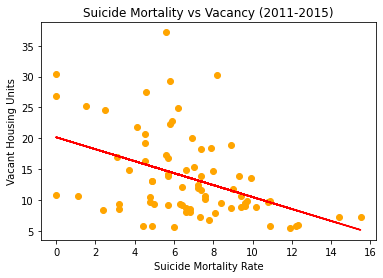

In [67]:
correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {correlation[0]}")


x_values = official_2011_df['Suicide Mortality Rate']
y_values = official_2011_df['Vacant Housing Units']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values,color='orange')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Suicide Mortality Rate')
plt.ylabel('Vacant Housing Units')
plt.title("Suicide Mortality vs Vacancy (2011-2015)")

plt.show() 

In [47]:
merged_2019_df = merged_df.drop(columns = ['VRSUR_2011-2015', 'VAC_2011-2015', 'Name'])
merged_2019_df

renamed_2019_df = merged_2019_df.rename(columns = {'VRSUR_2015-2019': 'Suicide Mortality Rate',
                                                  'VAC_2015-2019': "Vacant Housing Units"})
renamed_2019_df

official_2019_df = renamed_2019_df.astype(float)
official_2019_df

,Suicide Mortality Rate,Vacant Housing Units
0,9.9,10.638248
1,12.7,4.354325
2,11.8,7.927394
3,3.5,4.115101
4,11.7,6.047908
...,...,...
72,7.0,10.283461
73,8.7,5.102151
74,11.1,9.192521
75,11.9,13.589030


The r-value is: -0.4235380453678383
y = -0.97x + 20.16


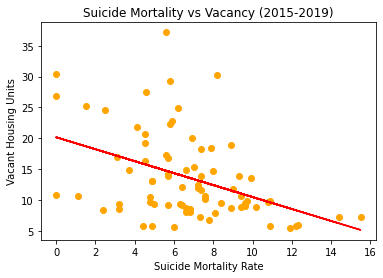

In [64]:
correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {correlation[0]}")


x_values = official_2011_df['Suicide Mortality Rate']
y_values = official_2011_df['Vacant Housing Units']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values,color='orange')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Suicide Mortality Rate')
plt.ylabel('Vacant Housing Units')
plt.title("Suicide Mortality vs Vacancy (2015-2019)")

plt.show() 